In [ ]:
import numpy as np

from time import time

import matplotlib.pyplot as plt

import networkx as nx



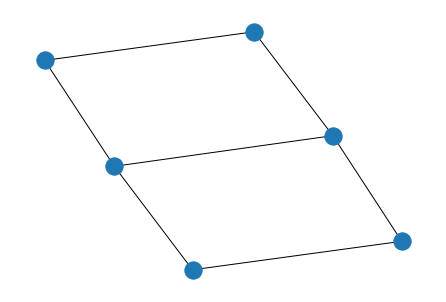

In [ ]:

g = nx.Graph()
 
g.add_edge(0, 1)
g.add_edge(1, 3)
g.add_edge(0, 2)
g.add_edge(2, 3)
g.add_edge(2, 4)
g.add_edge(3, 5)
g.add_edge(4, 5)
 
nx.draw(g)
plt.show()


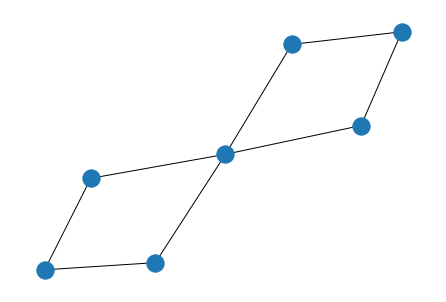

In [ ]:

g_edge_OBC = nx.Graph()
 
g_edge_OBC.add_edge(0, 1)
g_edge_OBC.add_edge(1, 2)
g_edge_OBC.add_edge(0, 3)
g_edge_OBC.add_edge(2, 3)
g_edge_OBC.add_edge(2, 4)
g_edge_OBC.add_edge(6, 5)
g_edge_OBC.add_edge(4, 5)
g_edge_OBC.add_edge(6, 2)
 
nx.draw(g_edge_OBC)
plt.show()

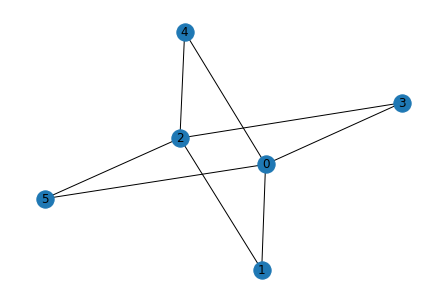

In [ ]:

g_edge_PBC= nx.Graph()
 
g_edge_PBC.add_edge(0, 1)
g_edge_PBC.add_edge(1, 2)
g_edge_PBC.add_edge(0, 3)
g_edge_PBC.add_edge(2, 3)
g_edge_PBC.add_edge(2, 4)
g_edge_PBC.add_edge(4, 0)
g_edge_PBC.add_edge(5, 0)
g_edge_PBC.add_edge(5, 2)
 
nx.draw(g_edge_PBC,with_labels=True)
plt.show()

In [ ]:
from qiskit.opflow import X, Z, I,Y


def Hamiltonian_PBC(g,h):
  X1 = Z^Z^Z^Z^I^I
  X2 = I^I^Z^Z^Z^Z
  Z1 = X^I^I^I^I^I
  Z2 = I^X^I^I^I^I
  Z3 = I^I^X^I^I^I
  Z4 = I^I^I^X^I^I
  Z5 = I^I^I^I^X^I
  Z6 = I^I^I^I^I^X

  H=(h*X1) + \
    (h*X2) + \
    (g*Z1) + \
    (g*Z2) + \
    (g*Z3) + \
    (g*Z4) + \
    (g*Z5) + \
    (g*Z6) 
  return H

In [ ]:
from qiskit.algorithms import NumPyEigensolver

# find the first three (k=3) eigenvalues
exact_solver = NumPyEigensolver(k=20)
exact_result = exact_solver.compute_eigenvalues(Hamiltonian_OBC(1,1))
print(exact_result.eigenvalues)


# Save ground state energy for later
gs_energy_OBC= np.round(exact_result.eigenvalues[0], 4)


[-7.24739924 -5.46466156 -5.36388667 -5.36388667 -5.36388667 -5.36388667
 -5.36388667 -5.36388667 -4.17672798 -4.17672798 -4.17672798 -4.17672798
 -4.17672798 -4.17672798 -3.49395921 -3.49395921 -3.49395921 -3.49395921
 -3.49395921 -3.49395921]


In [ ]:
def Hamiltonian_OBC(g,h):
  X1 = Z^Z^Z^Z^I^I^I
  X2 = I^I^I^Z^Z^Z^Z
  Z1 = X^I^I^I^I^I^I
  Z2 = I^X^I^I^I^I^I
  Z3 = I^I^X^I^I^I^I
  Z4 = I^I^I^X^I^I^I
  Z5 = I^I^I^I^X^I^I
  Z6 = I^I^I^I^I^X^I
  Z7 = I^I^I^I^I^I^X

  H=(h*X1) + \
    (h*X2) + \
    (g*Z1) + \
    (g*Z2) + \
    (g*Z3) + \
    (g*Z4) + \
    (g*Z5) + \
    (g*Z6) + \
    (g*Z7)
  return H

In [ ]:
from qiskit.algorithms import NumPyEigensolver

# find the first three (k=3) eigenvalues
exact_solver = NumPyEigensolver(k=20)
exact_result = exact_solver.compute_eigenvalues(Hamiltonian_PBC(1,1))
print(exact_result.eigenvalues)


# Save ground state energy for later
gs_energy_PBC = np.round(exact_result.eigenvalues[0], 4)

[-6.24977084 -4.47213595 -4.47213595 -4.37780212 -4.37780212 -4.37780212
 -4.37780212 -3.52311436 -3.23606798 -3.23606798 -3.23606798 -3.23606798
 -2.82842712 -2.82842712 -2.         -2.         -2.         -2.
 -2.         -1.23606798]


In [ ]:
from qiskit import IBMQ
#from qiskit.providers.aer import QasmSimulator, Aer

from qiskit import Aer, assemble, QuantumCircuit, QuantumRegister, ClassicalRegister, IBMQ, transpile, execute
from qiskit.circuit import Gate, Instruction, Parameter,ParameterVector


def ansatz_OBC(num_qubits,depth):
  theta = ParameterVector("t",depth*2)
  qr=QuantumRegister(num_qubits)
  circuit = QuantumCircuit(qr)
  index = 0

  circuit.x(qr[i] for i in range (0,7))
  circuit.h(qr[i] for i in range (0,7))
  for _ in range (0,depth): 

    circuit.cx(qr[3],qr[2])
    circuit.cx(qr[2],qr[1])
    circuit.cx(qr[1],qr[0])
    circuit.cx(qr[3],qr[4])
    circuit.cx(qr[4],qr[5])
    circuit.cx(qr[5],qr[6])

    circuit.rz(theta[index],qr[0])
    circuit.rz(theta[index],qr[6])
    index+=1

    circuit.cx(qr[5],qr[6])
    circuit.cx(qr[4],qr[5])
    circuit.cx(qr[3],qr[4])
    circuit.cx(qr[1],qr[0])
    circuit.cx(qr[2],qr[1])
    circuit.cx(qr[3],qr[2])
    circuit.barrier()
    for i in range (num_qubits):
      circuit.rx(theta[index], qr[i])
    index+=1
  
    
  return circuit


In [ ]:
ansatz_OBC(7,1).draw()

┌───┐┌───┐          ┌───┐┌──────────┐   ┌───┐                         ░ »
q89_0: ┤ X ├┤ H ├──────────┤ X ├┤ Rz(t[0]) ├───┤ X ├─────────────────────────░─»
       ├───┤├───┤     ┌───┐└─┬─┘└──────────┘   └─┬─┘    ┌───┐                ░ »
q89_1: ┤ X ├┤ H ├─────┤ X ├──■───────────────────■──────┤ X ├────────────────░─»
       ├───┤├───┤┌───┐└─┬─┘                             └─┬─┘          ┌───┐ ░ »
q89_2: ┤ X ├┤ H ├┤ X ├──■─────────────────────────────────■────────────┤ X ├─░─»
       ├───┤├───┤└─┬─┘                                                 └─┬─┘ ░ »
q89_3: ┤ X ├┤ H ├──■────■───────────────────────────────────────────■────■───░─»
       ├───┤├───┤     ┌─┴─┐                                       ┌─┴─┐      ░ »
q89_4: ┤ X ├┤ H ├─────┤ X ├──■─────────────────────────────────■──┤ X ├──────░─»
       ├───┤├───┤     └───┘┌─┴─┐                             ┌─┴─┐└───┘      ░ »
q89_5: ┤ X ├┤ H ├──────────┤ X ├─────■────────────────────■──┤ X ├───────────░─»
       ├───┤├───┤          └───┘   ┌─┴─┐    ┌──────────┐┌─┴─┐└───┘           ░ »
q89_6: ┤ X ├┤ H ├──────────────────┤ X ├────┤ Rz(t[0]) ├┤ X ├────────────────░─»
       └───┘└───┘                  └───┘    └──────────┘└───┘                ░ »
«       ┌──────────┐
«q89_0: ┤ Rx(t[1]) ├
«       ├──────────┤
«q89_1: ┤ Rx(t[1]) ├
«       ├──────────┤
«q89_2: ┤ Rx(t[1]) ├
«       ├──────────┤
«q89_3: ┤ Rx(t[1]) ├
«       ├──────────┤
«q89_4: ┤ Rx(t[1]) ├
«       ├──────────┤
«q89_5: ┤ Rx(t[1]) ├
«       ├──────────┤
«q89_6: ┤ Rx(t[1]) ├
«       └──────────┘

In [ ]:
def ansatz_PBC(num_qubits,depth):
  theta = ParameterVector("t",depth*2)
  qr=QuantumRegister(num_qubits)
  circuit = QuantumCircuit(qr)
  index = 0

  circuit.x(qr[i] for i in range (0,6))
  circuit.h(qr[i] for i in range (0,6))
  for _ in range (0,depth): 

    circuit.cx(qr[3],qr[2])
    circuit.cx(qr[2],qr[1])
    circuit.cx(qr[1],qr[0])
    circuit.rz(theta[index],qr[0])
    circuit.cx(qr[1],qr[0])
    circuit.cx(qr[2],qr[1])
    circuit.cx(qr[3],qr[2])


    circuit.cx(qr[2],qr[3])
    circuit.cx(qr[3],qr[4])
    circuit.cx(qr[4],qr[5])
    circuit.rz(theta[index],qr[5])
    circuit.cx(qr[4],qr[5])
    circuit.cx(qr[3],qr[4])
    circuit.cx(qr[2],qr[3])
    index+=1

    circuit.barrier()
    for i in range (num_qubits):
      circuit.rx(theta[index], qr[i])
    index+=1
  
    
  return circuit


In [ ]:
ansatz_PBC(6,1).draw()

┌───┐┌───┐          ┌───┐┌──────────┐┌───┐                         »
q90_0: ┤ X ├┤ H ├──────────┤ X ├┤ Rz(t[0]) ├┤ X ├─────────────────────────»
       ├───┤├───┤     ┌───┐└─┬─┘└──────────┘└─┬─┘┌───┐                    »
q90_1: ┤ X ├┤ H ├─────┤ X ├──■────────────────■──┤ X ├────────────────────»
       ├───┤├───┤┌───┐└─┬─┘                      └─┬─┘┌───┐               »
q90_2: ┤ X ├┤ H ├┤ X ├──■──────────────────────────■──┤ X ├──■────────────»
       ├───┤├───┤└─┬─┘                                └─┬─┘┌─┴─┐          »
q90_3: ┤ X ├┤ H ├──■────────────────────────────────────■──┤ X ├──■───────»
       ├───┤├───┤                                          └───┘┌─┴─┐     »
q90_4: ┤ X ├┤ H ├───────────────────────────────────────────────┤ X ├──■──»
       ├───┤├───┤                                               └───┘┌─┴─┐»
q90_5: ┤ X ├┤ H ├────────────────────────────────────────────────────┤ X ├»
       └───┘└───┘                                                    └───┘»
«                                   ░ ┌──────────┐
«q90_0: ────────────────────────────░─┤ Rx(t[1]) ├
«                                   ░ ├──────────┤
«q90_1: ────────────────────────────░─┤ Rx(t[1]) ├
«                                   ░ ├──────────┤
«q90_2: ────────────────────────■───░─┤ Rx(t[1]) ├
«                             ┌─┴─┐ ░ ├──────────┤
«q90_3: ───────────────────■──┤ X ├─░─┤ Rx(t[1]) ├
«                        ┌─┴─┐└───┘ ░ ├──────────┤
«q90_4: ──────────────■──┤ X ├──────░─┤ Rx(t[1]) ├
«       ┌──────────┐┌─┴─┐└───┘      ░ ├──────────┤
«q90_5: ┤ Rz(t[0]) ├┤ X ├───────────░─┤ Rx(t[1]) ├
«       └──────────┘└───┘           ░ └──────────┘

In [ ]:
from qiskit.algorithms.optimizers import SPSA,COBYLA,L_BFGS_B,SLSQP

spsa = SPSA(maxiter=100,blocking=False, allowed_increase=1, trust_region=False,
                 learning_rate=None, perturbation=None, last_avg=10, resamplings=1,
                 perturbation_dims=None, second_order=False, regularization=None, 
                 hessian_delay=0, lse_solver=None, initial_hessian=None, callback=None,
                 termination_checker=None)

cobyla=COBYLA(maxiter=30, disp=True, rhobeg=1.0, tol=1e-4, options=None)
slsqp=SLSQP(maxiter=100, disp=False, ftol=1e-06, tol=None, eps=1.4901161193847656e-08, options=None, max_evals_grouped=1)

In [ ]:
from qiskit.algorithms import MinimumEigensolver, VQEResult

# Define a custome VQE class to orchestra the ansatz, classical optimizers, 
# initial point, callback, and final result
class CustomVQE(MinimumEigensolver):
    
    def __init__(self, estimator, circuit, optimizer, callback=None):
        self._estimator = estimator
        self._circuit = circuit
        self._optimizer = optimizer
        self._callback = callback
        
    def compute_minimum_eigenvalue(self, operators, aux_operators=None):
                
        # Define objective function to classically minimize over
        def objective(x):
            # Execute job with estimator primitive
            job = self._estimator.run([self._circuit], [operators], [x])
            # Get results from jobs
            est_result = job.result()
            # Get the measured energy value
            value = est_result.values[0]
            # Save result information using callback function
            if self._callback is not None:
                self._callback(value)
            return value
            
        # Select an initial point for the ansatzs' parameters
        x0 = np.pi/4 * np.random.rand(self._circuit.num_parameters)
        
        # Run optimization
        res = self._optimizer.minimize(objective, x0=x0)
        
        # Populate VQE result
        result = VQEResult()
        result.cost_function_evals = res.nfev
        result.eigenvalue = res.fun
        result.optimal_parameters = res.x
        return result

In [ ]:
from qiskit.primitives import Estimator

In [ ]:
# Define a simple callback function
intermediate_info_PBC= []
def callback(value):
        intermediate_info_PBC.append(value)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 30,
    'eigenstate': None,
    'eigenvalue': -6.24095302699507,
    'optimal_circuit': None,
    'optimal_parameters': array([0.23793915, 0.39223352]),
    'optimal_point': None,
    'optimal_value': None,
    'optimizer_evals': None,
    'optimizer_result': None,
    'optimizer_time': None}
execution time (s): 0.39


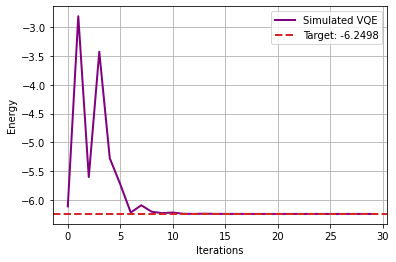

In [ ]:
# Define instance of qiskit-terra's Estimator primitive
estimator = Estimator([ansatz_PBC(6,1)],[Hamiltonian_PBC(1,1)])

# Setup VQE algorithm
custom_vqe = CustomVQE(estimator, ansatz_PBC(6,1), cobyla, callback=callback)

# Run the custom VQE function and monitor execution time
start = time()
result = custom_vqe.compute_minimum_eigenvalue(Hamiltonian_PBC(1,1))
end = time()

print(result)
print(f'execution time (s): {end - start:.2f}')
plt.plot(intermediate_info_PBC, color='purple', lw=2, label='Simulated VQE')
plt.ylabel('Energy')
plt.xlabel('Iterations')
# Exact ground state energy value
plt.axhline(y=gs_energy_PBC, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy_PBC))
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Define a simple callback function
intermediate_info_OBC = []
def callback(value):
        intermediate_info_OBC.append(value)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 30,
    'eigenstate': None,
    'eigenvalue': -7.2357364600542455,
    'optimal_circuit': None,
    'optimal_parameters': array([0.2302675 , 1.96252669]),
    'optimal_point': None,
    'optimal_value': None,
    'optimizer_evals': None,
    'optimizer_result': None,
    'optimizer_time': None}
execution time (s): 0.37


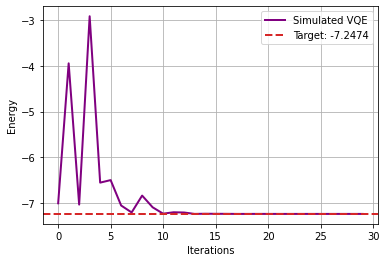

In [ ]:
# Define instance of qiskit-terra's Estimator primitive
estimator = Estimator([ansatz_OBC(7,1)],[Hamiltonian_OBC(1,1)])

# Setup VQE algorithm
custom_vqe = CustomVQE(estimator, ansatz_OBC(7,1), cobyla, callback=callback)

# Run the custom VQE function and monitor execution time
start = time()
result = custom_vqe.compute_minimum_eigenvalue(Hamiltonian_OBC(1,1))
end = time()

print(result)
print(f'execution time (s): {end - start:.2f}')
plt.plot(intermediate_info_OBC, color='purple', lw=2, label='Simulated VQE')
plt.ylabel('Energy')
plt.xlabel('Iterations')
# Exact ground state energy value
plt.axhline(y=gs_energy_OBC, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy_OBC))
plt.legend()
plt.grid()
plt.show()